In [2]:

'''
Importing Libraries
'''
import pandas as pd
import numpy as np 
import seaborn as sns
import requests
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('Felony_Sentences.csv')

data.head(20)

,OBJECTID,RID,GENERIC_CASE_ID,GENERIC_OFFENDER_ID,CHARGE_NUMBER,SENTENCE_YEAR,RACE,GENDER,AGE_GROUP,OFFENSE,...,OFFENSE_SEVERITY_GROUP,SENTENCE_TYPE,SENTENCE_IMPOSED_MONTHS,SENTENCE_SUSPENDED_MONTHS,SENTENCE_TO_SERVE_MONTHS,SENTENCE_PROBATION_MONTHS,VVCA_AMT,FINE_AMT,RESTITUTION_AMT,FINE_SUSPENDED_AMT
0,1,1,3574668,3485785,1,2018,Black,M,15-17,1ST DEG MURDER W/ARMED,...,M1,Indeterminate/Incarceration,NaN,NaN,NaN,NaN,100,0.0,0.0,0.0
1,2,2,3806508,7427096,9,2018,Black,M,15-17,Conspiracy,...,M9,Indeterminate,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
2,3,3,3806508,7427096,12,2018,Black,M,15-17,Murder I,...,M1,Life,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
3,4,4,3806508,7427096,13,2018,Black,M,15-17,1ST DEG MURDER W/ARMED,...,M1,Life,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
4,5,5,3806508,7427096,15,2018,Black,M,15-17,Poss Firearm During Crime of Violence or Dange...,...,M5,Indeterminate,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
5,6,6,3806508,7427096,16,2018,Black,M,15-17,Carrying a Pistol Without a License,...,M8,Short Split,12.0,12.0,1.0,60.0,0,0.0,0.0,0.0
6,7,7,7806164,1021121,2,2018,Other or Unknown,M,22-30,UCSA PWID COCAINE,...,D2,Indeterminate,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
7,8,8,9015717,5317747,4,2018,Other or Unknown,M,15-17,ASLT W/I KILL WHILE ARMED,...,M3,Probation,180.0,180.0,0.0,36.0,0,0.0,0.0,0.0
8,9,9,4792566,7849479,6,2018,Black,M,15-17,1ST DEG MURDER W/ARMED,...,M1,Life,NaN,NaN,NaN,NaN,100,0.0,0.0,0.0
9,10,10,4792566,7849479,7,2018,Black,M,15-17,POS. F/A DURING VIO/DAG OFF,...,M5,Indeterminate,NaN,NaN,NaN,NaN,100,0.0,0.0,0.0


In [4]:
'''RID/Race/offesce type/offense/severity - is the severity of similar crimes the same by race?'''

'''cases by race - how many cases are there per race?'''

'''type by age and gender'''

'''Race/offense type/sentence type/sentence imposted month - are sentences given similar for similar crimes by race?'''

'Race/offense type/sentence type/sentence imposted month - are sentences given similar for similar crimes by race?'

In [5]:
race = data.value_counts('RACE')
race.head()

RACE
Black               21184
Other or Unknown     1262
White                 823
Hispanic               49
Asian                  12
dtype: int64

In [6]:
gender = data.value_counts('GENDER')
gender.head()

GENDER
M    21218
F     1858
dtype: int64

In [7]:
age = data.value_counts('AGE_GROUP')
print(age)

AGE_GROUP
22-30    7783
18-21    5540
31-40    4259
41-50    2964
51-60    1632
15-17     720
61-70     305
71+        22
dtype: int64


In [8]:
sns.barplot(x = "AGE_GROUP", y = "GENDER", data = data)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [35]:
#Calculate the average number of charges by each gender in each race listed in this dataset
charges = pd.DataFrame(data.groupby(['RACE', 'GENDER']).agg('mean')['CHARGE_NUMBER']).reset_index()

In [36]:
#Fetch the average number of charges for male members belonging to each race
male_charges = list(charges[charges['GENDER'] =='M']['CHARGE_NUMBER'])

#Fetch the average number of charges for female members belonging to each race
female_charges = list(charges[charges['GENDER'] =='F']['CHARGE_NUMBER'])

#Insert 0s for the average charge numbers for female Native Americans and Pacific Islanders(becasue they are not present in the dataset)
female_charges.insert(3, 0)
female_charges.insert(5, 0)

races = list(charges['RACE'].unique())
X_axis = np.arange(0, len((charges['RACE'].unique())))

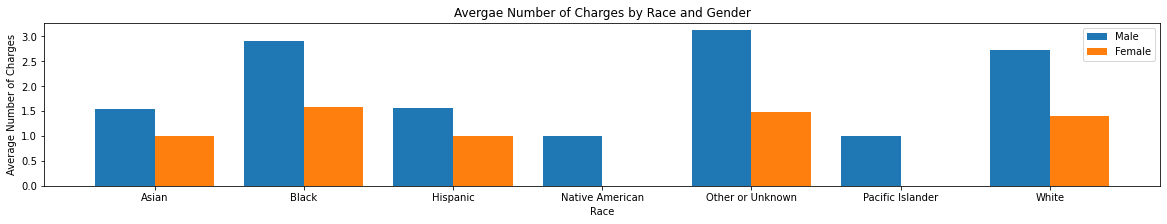

In [37]:
#Plotting the average number of charges by race and gender
plt.bar(X_axis - 0.2, male_charges, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_charges, 0.4, label = 'Female')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(X_axis, races)
plt.xlabel("Race")
plt.ylabel("Average Number of Charges")
plt.title("Avergae Number of Charges by Race and Gender")
plt.legend()
plt.show()

In [23]:
rsa = data[['RACE','AGE_GROUP','SENTENCE_IMPOSED_MONTHS']]
rsa.head()

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
0,Black,15-17,NaN
1,Black,15-17,NaN
2,Black,15-17,NaN
3,Black,15-17,NaN
4,Black,15-17,NaN


In [28]:
rsa_clean = rsa.dropna(axis=0, inplace= False).reset_index()
rsa_clean

,index,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
0,5,Black,15-17,12.0
1,7,Other or Unknown,15-17,180.0
2,10,Black,15-17,20.0
3,15,Black,22-30,1.0
4,16,Black,22-30,1.0
...,...,...,...,...
22983,23327,White,41-50,24.0
22984,23328,Black,41-50,5.0
22985,23329,Black,22-30,3.0
22986,23330,Black,41-50,1.0


In [46]:
rsaGroup1 = rsa_clean[rsa_clean['AGE_GROUP'] == '15-17']
rsaGroup1

,index,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
0,5,Black,15-17,12.0
1,7,Other or Unknown,15-17,180.0
2,10,Black,15-17,20.0
164,176,Black,15-17,120.0
214,226,Black,15-17,180.0
...,...,...,...,...
22381,22720,Black,15-17,40.0
22462,22801,Black,15-17,96.0
22775,23118,Black,15-17,24.0
22776,23119,Black,15-17,18.0


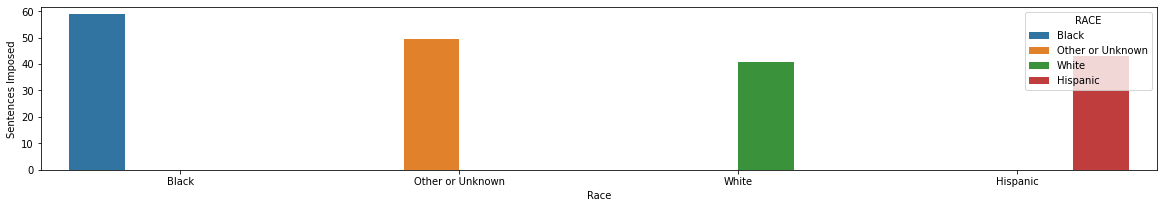

In [51]:
sns.barplot(x = 'RACE', y = 'SENTENCE_IMPOSED_MONTHS', hue = 'RACE', data = rsaGroup1, ci = None)
plt.xlabel('Race')
plt.ylabel('Sentences Imposed')
plt.show()